# Coursera Machine Learning course code rewritten in Python

## Linear Regression

### Prelude

In [34]:
import csv
import matplotlib.pyplot as plt
from numpy import *
from math import exp
from scipy.optimize import fmin

### Data retrieval

In [3]:
def getIiter(ifname):
    """
    Get the iterator from a csv file with filename ifname
    """
    ifile = open(ifname, 'r')
    iiter = csv.reader(ifile)
    return iiter

In [4]:
def getRow(iiter):
    """
    Get one line from a csv iterator
    """
    return parseRow(iiter.__next__())

In [5]:
def parseRow(s):
    t = [float(x) for x in s]
    return t[0], t[1]

In [6]:
def getAllRows(ifname, parseRowFunc):
    iiter = getIiter(ifname)
    x = []
    y = []
    for row in iiter:
        x1, y1 = parseRowFunc(row)
        x.append(x1)
        y.append(y1)
    return x, y

### Plotting

In [11]:
plotDots = plt.scatter

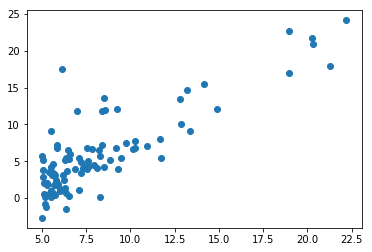

In [11]:
x, y = getAllRows('ex1data1.txt', parseRow)
plotDots(x, y)
plt.show()

In [12]:
trainX = [[1, z] for z in x]
trainY = [[z] for z in y]
m = len(trainX)

In [13]:
initTheta = zeros((len(trainX[0]), 1))
alpha = .01
epsilon = .01
deltaEpsilon = .0000000001

### Training

In [7]:
def trainFun(costFunction, updateTheta):
    def train(theta, x, y):
        error = costFunction(theta, x, y)
        deltaError = deltaEpsilon + 1
        #for i in range(10000):
        while deltaError > deltaEpsilon and error > epsilon:
            theta = updateTheta(theta, x, y)
            newError = costFunction(theta, x, y)
            deltaError = abs(newError - error)
            error = newError
        return theta, error, deltaError
    return train

In [25]:
def costFunction(theta, x, y):
    return linalg.norm(dot(x, theta) - y) ** 2 / 2 / m

In [26]:
print(costFunction(initTheta, trainX, trainY))

32.0727338775


In [27]:
def updateTheta(theta, x, y):
    return theta - alpha / m * dot(array(x).T, (dot(x, theta) - y))

In [56]:
train = trainFun(costFunction, updateTheta)

Train the data:

In [57]:
theta, error, deltaError = train(initTheta, trainX, trainY)
print(theta, error, deltaError)

[[-3.89522991]
 [ 1.19297829]] 4.47697140361 9.99040850047e-11


For comparison, the result using linalg.lstsq:

In [30]:
linalg.lstsq(trainX, trainY)

(array([[-3.89578088],
        [ 1.19303364]]),
 array([ 868.53244694]),
 2,
 array([ 89.3067594 ,   4.18152836]))

In [40]:
def plotLine(theta, x):
    xmin = min(x)
    xmax = max(x)
    xr = arange(xmin, xmax, (xmax - xmin) / 100)
    yr = [theta[0][0] + x * theta[1][0] for x in xr]
    plt.plot(xr, yr)

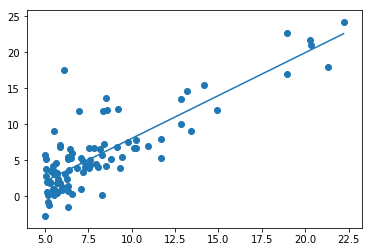

In [37]:
plotLine(theta, x)
plotDots(x, y)
plt.show()

### Predicting

In [38]:
def prediction(theta, x):
    return theta[0][0] + theta[1][0] * x

In [39]:
print(prediction(theta, 3.5), prediction(theta, 7))

0.280194115407 4.45561814337


## Logistical regression

### Data retrieval

In [8]:
def parseRow1(s):
    return [float(s[0]), float(s[1])], int(s[2])

### Plot data

In [9]:
def plotDots1(x, y):
    xpos = []
    ypos = []
    xneg = []
    yneg = []
    for [xx, yy], zz in zip(x, y):
        if zz == 1:
            xpos.append(xx)
            ypos.append(yy)
        else:
            xneg.append(xx)
            yneg.append(yy)
    plotDots(xpos, ypos, color='g')
    plotDots(xneg, yneg, color='r')

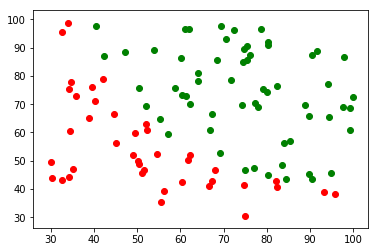

In [12]:
x, y = getAllRows('ex2data1.txt', parseRow1)
plotDots1(x, y)
plt.show()

### Training

In [13]:
def sigmoid(x):
    return 1 / (1 + exp(- x))

In [14]:
vSigmoid = vectorize(sigmoid)
vLog = vectorize(log)

In [15]:
def costFunction1(theta, x, y):
    sigxt = vSigmoid(dot(x, theta))
    return - 1 / m * (dot(y.T, vLog(sigxt)) + dot((1 - y.T), vLog(1 - sigxt)))

In [16]:
def gradient1(theta, x, y):
    sigxt = vSigmoid(dot(x, theta))
    #print(shape(sigxt), shape(y), shape(x))
    return 1 / m * dot(x.T, (sigxt - y))

In [17]:
def updateTheta1(theta, x, y):
    #sigxt = vSigmoid(dot(x, theta))
    return theta - alpha * gradient1(theta, x, y)
    #return theta - alpha / m * dot(x.T, sigxt - y)

In [18]:
train1 = trainFun(costFunction1, updateTheta1)

In [19]:
trainX = array([[1] + z for z in x])
trainY = array([[z] for z in y])
m = len(trainX)

In [30]:
initTheta = zeros((len(trainX[0]), 1))
alpha = .0006
epsilon = .01
deltaEpsilon = .0000000001

If we do with the same alpha all the time, the first alpha has to be small like .0006, because for example .001 does not make costFunction1 decrease on first iteration and .0007 makes the decrement smaller than .0006. But setting alpha to be constantly .0006 has its own problem: the cost function decreases very slowly. For example, after 10000 iterations, it only goes from .693 to .602, whereas in ml-class with fminunc, after 400 iterations it goes down to .203.

In [25]:
print(costFunction1(initTheta, trainX, trainY))
print(gradient1(initTheta, trainX, trainY))
theta = updateTheta1(initTheta, trainX, trainY)
print(costFunction1(theta, trainX, trainY))

[[ 0.69314718]]
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
[[ 0.63637645]]


In [165]:
theta, error, deltaError = train1(initTheta, trainX, trainY)
print(theta, error, deltaError)

[[-0.40824491]
 [ 0.01326649]
 [ 0.00362859]] [[ 0.60202439]] [[  2.63830809e-06]]


In [27]:
def costFunctionTheta(theta):
    return costFunction1(theta, trainX, trainY)

In [35]:
#print(fmin_bfgs(costFunctionTheta, initTheta, maxiter=0))
theta = fmin(costFunctionTheta, initTheta, maxiter=200)
#print(theta, error, deltaError)
print(theta)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
[-25.16130062   0.20623142   0.20147143]


fmin_bfgs didn't work (even with one iteration it gives division by 0 error).
The cost function of the optimal theta calculated by fmin is the same (0.203498) as the one obtained by fminunc in octave.

More info on fmin: https://docs.scipy.org/doc/scipy-0.10.0/reference/generated/scipy.optimize.fmin.html#scipy.optimize.fmin

In [37]:
print(costFunction1(theta, trainX, trainY))

[ 0.2034977]


In [38]:
def plotLine1(theta, x):
    theta0 = - theta[0] / theta[2]
    theta1 = - theta[1] / theta[2]
    plotLine([[theta0], [theta1]], [y[0] for y in x])

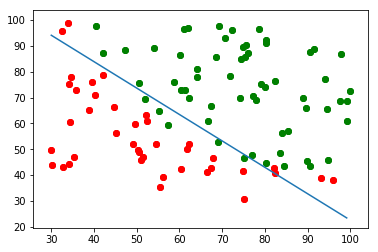

In [41]:
plotDots1(x, y)
plotLine1(theta, x)
plt.show()

### Prediction

In [45]:
def predictProb(x):
    return sigmoid(dot([1] + x, theta))

In [43]:
def predict(x):
    p = predictProb(x)
    if p > .5:
        return 1
    else:
        return 0

In [54]:
def accuracy(x, y):
    b = [1 if predict(xx) == yy else 0 for xx, yy in zip(x, y)]
    return sum(b) / len(b)

In [55]:
accuracy(x, y)

0.89000000000000001